In [1]:
import pandas as pd
import requests
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize, wordpunct_tokenize
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [2]:
file_list = [r"dataset\raw\180125_163711sampai155628.csv",
             r"dataset\raw\230125_162004sampai143459.csv",
             r"dataset\raw\020225_150730sampai174202.csv",
             r"dataset\raw\Tweet 19-01-2025 17.20 - 21.23 .csv"]

In [3]:
df = pd.DataFrame(columns=["id",
                           "edit_history_tweet_ids",
                           "created_at",
                           "text",
                           "author_id"])

In [4]:
for i in file_list:
    add_df = pd.read_csv(i)
    df = pd.concat([df,add_df]).reset_index(drop=True)

# Preprocessing Pipeline

https://pub.aimind.so/a-comprehensive-guide-to-text-preprocessing-for-twitter-data-getting-ready-for-sentiment-analysis-e7f91cd03671

1. Lower casing
2. 

## Lower Casing

In [5]:
df['text_cleaned'] = df['text'].apply(lambda x: x.lower())

In [6]:
df.head()

,id,edit_history_tweet_ids,created_at,text,author_id,Unnamed: 0,text_cleaned
0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,NaN,ketua umum pdip megawati soekarnoputri sempat ...
1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,NaN,@habilisl hold $wowo dapat airdrop makan siang...
2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,NaN,kalau mbg nya ini gue juga mau dut biar gue mu...
3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,NaN,@neohistoria_id program mbg tuh b nya bersyuku...
4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,NaN,@03__nakula ga semua anak indonesia bisa makan...


## Remove Url and HTML tag

In [7]:
#!pip install lxml

In [7]:
import re
from bs4 import BeautifulSoup

# Removing URLs
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'http\S+|t.co\S+', '', x))

# Removing HTML tags
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "lxml").text)

C:\Users\Revalda Putawara\AppData\Local\Temp\ipykernel_61748\3004224775.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "lxml").text)


In [8]:
df.head()

,id,edit_history_tweet_ids,created_at,text,author_id,Unnamed: 0,text_cleaned
0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,NaN,ketua umum pdip megawati soekarnoputri sempat ...
1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,NaN,@habilisl hold $wowo dapat airdrop makan siang...
2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,NaN,kalau mbg nya ini gue juga mau dut biar gue mu...
3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,NaN,@neohistoria_id program mbg tuh b nya bersyuku...
4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,NaN,@03__nakula ga semua anak indonesia bisa makan...


## Preserve "Makan Bergizi Gratis" term

In [9]:
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'makan bergizi gratis', 'makanbergizigratis', x))
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'makan siang gratis', 'makansianggratis', x))

## Chat words Removal

In [10]:
#convert chatwords 
chat_words_dict = {
    "yg": "yang",
    "dgn": "dengan",
    "kalo":"kalau",
    "ga": "enggak",
    "gak": "enggak",
    "aja": "saja",
    "komplen":"komplain",
    "sebenernya":"sebenarnya",
    #more chat words were added while doing text preprocessing. 
}

# 2. define conversion function
def convert_chat_words(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.lower() in chat_words_dict:
            converted_words.append(chat_words_dict[word.lower()])
        else:
            converted_words.append(word)
    converted_text = " ".join(converted_words)
    return converted_text

# 3. apply to dataframe

df['text_cleaned'] = df['text_cleaned'].apply(convert_chat_words)

## Remove non Alphanumeric Characters

In [11]:
# remove username      
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub('@[^\s]+','', x))
# Removing special characters
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r"[^\w\s]", '', x))

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Revalda Putawara\AppData\Local\Temp\ipykernel_61748\43075149.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub('@[^\s]+','', x))


## Stemming

In [12]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['text_cleaned_stemmed'] = df['text_cleaned'].apply(lambda x: stemmer.stem(x))

## Tokenizing process

In [13]:
# Tokenization
df['tokens'] = df['text_cleaned_stemmed'].apply(lambda x: wordpunct_tokenize(x))

In [14]:
df.at[0,"tokens"]

['ketua',
 'umum',
 'pdip',
 'megawati',
 'soekarnoputri',
 'sempat',
 'pesimis',
 'dengan',
 'program',
 'makanbergizigratis',
 'yang',
 'canang',
 'presiden',
 'prabowo',
 'sementara',
 'itu',
 'dasar',
 'terang',
 'badan',
 'gizi',
 'nasional',
 'anggar',
 'sebut',
 'dasar',
 'hitung',
 'dari',
 'hasil',
 'uji',
 'coba',
 'makanbergizigratis',
 'yang',
 'telah']

## Stopwords

Courtesy of 

[1] Tala, F. Z. (2003). A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia. M.Sc. Thesis. Master of Logic Project. Institute for Logic, Language and Computation. Universiteit van Amsterdam, The Netherlands.

In [15]:
f = open("id.stopwords.02.01.2016.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

stopword_list.append("nya")
stopword_list.append("ya")

len(stopword_list)

760

In [16]:
df.at[0,"text_cleaned"]

'ketua umum pdip megawati soekarnoputri sempat pesimis dengan program makanbergizigratis yang dicanangkan presiden prabowo sementara itu berdasarkan keterangan badan gizi nasional anggaran tersebut berdasarkan perhitungan dari hasil uji coba makanbergizigratis yang telah'

In [17]:
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopword_list])

In [18]:
df.at[0,"tokens"]

['ketua',
 'pdip',
 'megawati',
 'soekarnoputri',
 'pesimis',
 'program',
 'makanbergizigratis',
 'canang',
 'presiden',
 'prabowo',
 'dasar',
 'terang',
 'badan',
 'gizi',
 'nasional',
 'anggar',
 'dasar',
 'hitung',
 'hasil',
 'uji',
 'coba',
 'makanbergizigratis']

# Worcloud Visualization

In [20]:
#!pip install wordcloud

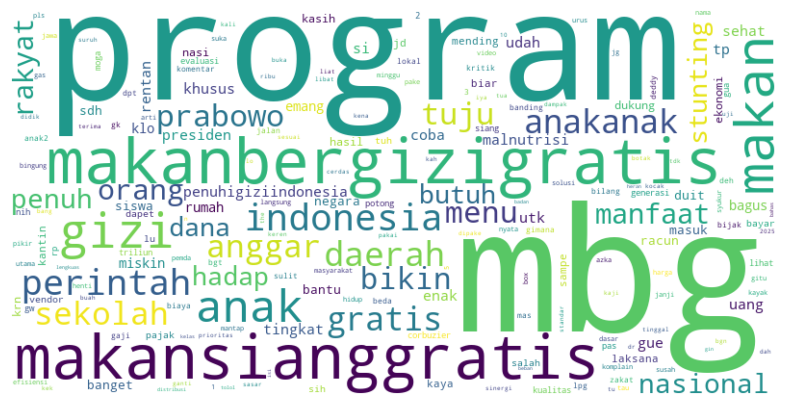

In [19]:

# Create a list of all tokens
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(nltk.FreqDist(all_tokens)))
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Frequency

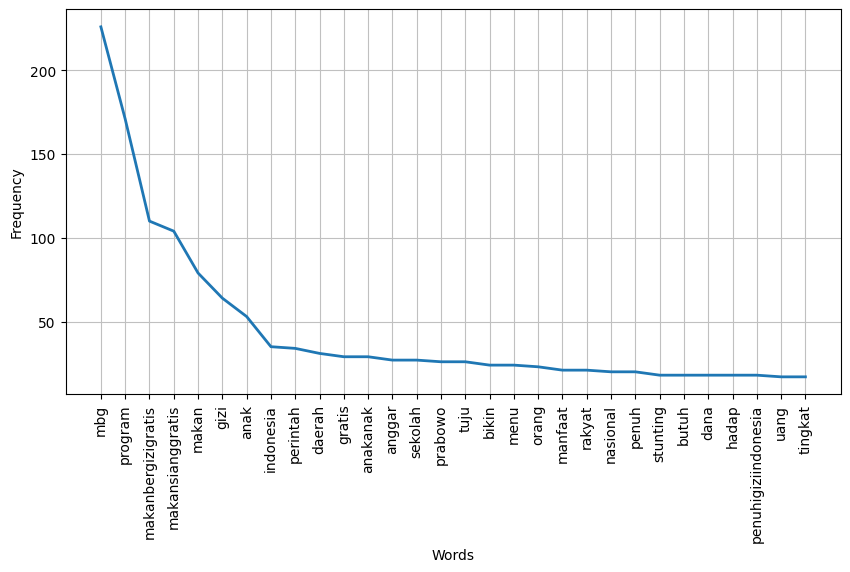

In [20]:
# Calculate word frequency
freq_dist = FreqDist(all_tokens)
# Plot the most common words
plt.figure(figsize=(10, 5))
freq_dist.plot(30, cumulative=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Save file to csv

In [21]:
df.loc[:, df.columns != 'tokens'].to_csv(r"dataset\processed\processed_data.csv")

## Check timestamp

In [22]:
from matplotlib import pyplot as plt

In [23]:
df["created_at"] = pd.DataFrame({"created_at": pd.to_datetime(df["created_at"])})

In [ ]:
stopdisini

<Axes: ylabel='created_at'>

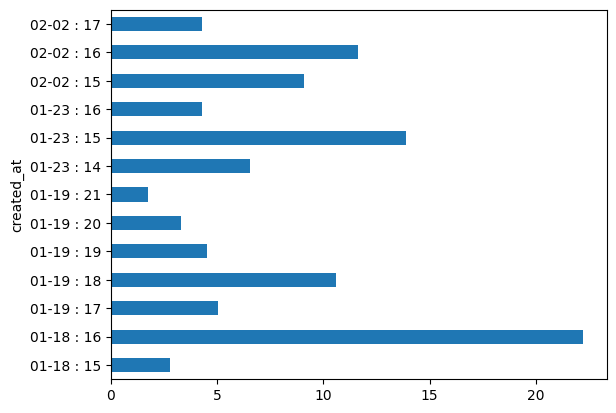

In [25]:
fig, ax = plt.subplots(1, 1)
((df.groupby(df.created_at.dt.strftime("%m-%d : %H")).size() / len(df) * 100)
   .plot.barh(ax=ax))

In [ ]:
"""
import csv
# Input and output file names
txt_file = r"dataset\raw\tes.txt"   # Replace with your text file name
csv_file = r"dataset\raw\output.csv"  # Output CSV file

# Open the text file and read lines
with open(txt_file, "r", encoding="utf-8") as infile, open(csv_file, "w", newline="", encoding="utf-8") as outfile:
    csv_writer = csv.writer(outfile)

    for line in infile:
        # Automatically detect common delimiters (comma, tab, space)
        row = line.strip().split()  # Modify if needed (e.g., split(',') for CSV-style text)
        csv_writer.writerow(row)

print(f"Conversion complete! CSV file saved as {csv_file}")
"""

## Check

Compare tweet before preprocessing and after preprocessing

In [ ]:
df.head()

In [ ]:
df.at[0,"text"]

In [ ]:
df.at[0,"text_cleaned"]

In [ ]:
df.at[0,"text_cleaned_stemmed"]